In [1]:
import pandas as pd 
import numpy as np

%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

# Dataset Spain
After the 18th of May the Spanish government stopped publishing data about recovered

In [108]:
# data until 17 may
url = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/covid-19-es.csv"
# data until 31 march
url_confirmed = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/confirmed-march31.csv"
url_recovered = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/recovered-march31.csv"
url_death = "https://raw.githubusercontent.com/mariocastro73/predictability/master/datasets/deaths-march31.csv"

df = pd.read_csv(url, keep_date_col=True)
df = df[~df.isna().any(axis=1)].reset_index(drop=True)
df['Day'] = pd.date_range(start="2020.01.31", end="2020.05.17")
df['Day'] = pd.to_datetime(df.Day, format='%Y-%m-%d').dt.strftime('%Y.%m.%d')

df.loc[(df.Day <= "2020.03.31") & (df.Day >= "2020.02.27"), ['Death', 'Confirmed', 'Recovered']] = np.column_stack([pd.read_csv(url_death)['Spain'],
                                                                        pd.read_csv(url_confirmed)['Spain'],
                                                                        pd.read_csv(url_recovered)['Spain']])
df['Active_cases'] = df.Confirmed - df.Recovered - df.Death
df['Active_cases_smooth'] = df.Active_cases.rolling(2, min_periods=1).mean()
df['Recovered_Death'] = (df.Recovered + df.Death).diff().fillna(0) # (daily derivative)
df['Recovered_Death_smooth'] = df.Recovered_Death.rolling(2, min_periods=1).mean()

df = df[df.Day >= '2020.02.28'].reset_index(drop=True)
df.loc[0, 'Recovered_Death_smooth'] = 0.

df

,Day,Death,Confirmed,Recovered,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.28,0.0,32.0,0.0,32.0,24.0,0.0,0.0
1,2020.02.29,0.0,44.0,0.0,44.0,38.0,0.0,0.0
2,2020.03.01,0.0,66.0,0.0,66.0,55.0,0.0,0.0
3,2020.03.02,0.0,114.0,0.0,114.0,90.0,0.0,0.0
4,2020.03.03,0.0,150.0,0.0,150.0,132.0,0.0,0.0
...,...,...,...,...,...,...,...,...
75,2020.05.13,27091.0,228691.0,140823.0,60777.0,61570.0,2025.0,2019.0
76,2020.05.14,27308.0,229540.0,143374.0,58858.0,59817.5,2768.0,2396.5
77,2020.05.15,27449.0,230183.0,144783.0,57951.0,58404.5,1550.0,2159.0
78,2020.05.16,27549.0,230698.0,146446.0,56703.0,57327.0,1763.0,1656.5


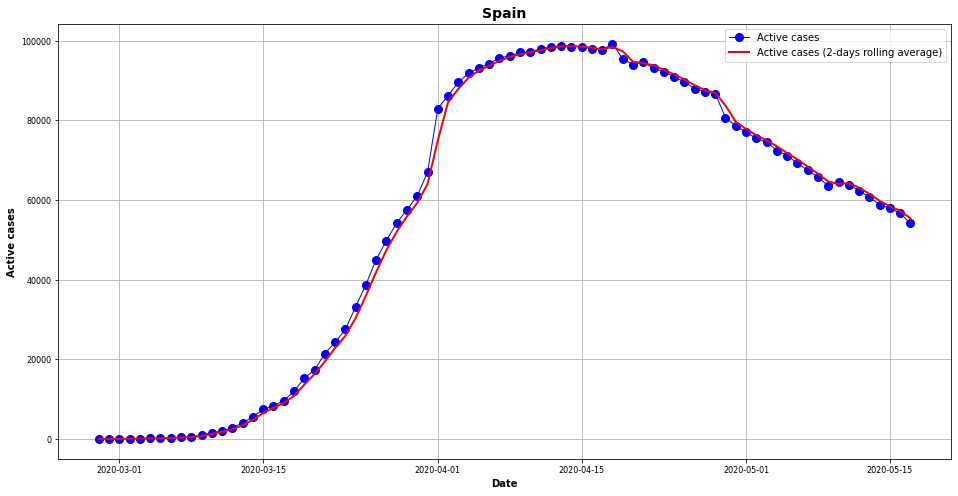

In [5]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df.Day), df.Active_cases, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df.Day), df.Active_cases_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

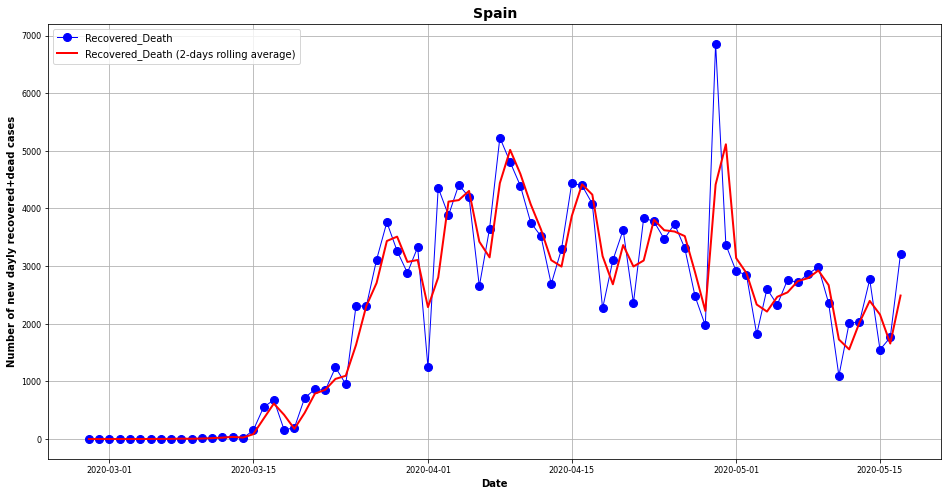

In [6]:
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df.Day[df.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Spain', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)

In [7]:
# save spanish dataframe as csv
df.to_csv('../Data/dataset_esp.csv', index=False)

# Dataset Italy
The data is taken from Protezione Civile site, starting from 2020.02.24.

In [8]:
# dataset active cases
# all data from 2020-02-28 to today
url_ita = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento" + \
            "-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

df1 = pd.read_csv(url_ita)[['data', 'totale_casi', 'dimessi_guariti', 'deceduti']]
df1.columns = ['Day', 'Confirmed', 'Recovered', 'Death']
df1['Day'] = pd.to_datetime(df1.Day, format='%Y.%m.%d').dt.strftime('%Y.%m.%d')


df1['Active_cases'] = df1.Confirmed - df1.Recovered - df1.Death
df1['Active_cases_smooth'] = df1.Active_cases.rolling(7, min_periods=1).mean()
df1['Recovered_Death'] = (df1.Recovered + df1.Death).diff().fillna(0) # (daily derivative)
df1['Recovered_Death_smooth'] = df1.Recovered_Death.rolling(7, min_periods=1).mean()


df1

,Day,Confirmed,Recovered,Death,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.24,229,1,7,221,221.000000,0.0,0.000000
1,2020.02.25,322,1,10,311,266.000000,3.0,1.500000
2,2020.02.26,400,3,12,385,305.666667,4.0,2.333333
3,2020.02.27,650,45,17,588,376.250000,47.0,13.500000
4,2020.02.28,888,46,21,821,465.200000,5.0,11.800000
...,...,...,...,...,...,...,...,...
500,2021.07.08,4267105,4097905,127731,41469,43919.714286,1762.0,2029.428571
501,2021.07.09,4268491,4099339,127756,41396,43007.857143,1459.0,1898.857143
502,2021.07.10,4269885,4101102,127768,41015,42356.285714,1775.0,1705.000000
503,2021.07.11,4271276,4102420,127775,41081,41844.428571,1325.0,1648.857143


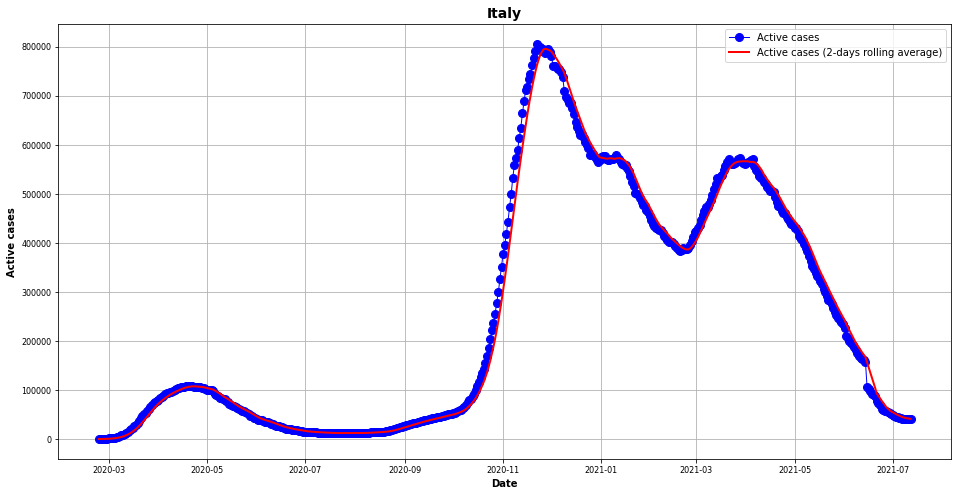

In [10]:
# save fgure with plot from january
plt.plot(pd.to_datetime(df1.Day), df1.Active_cases, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df1.Day), df1.Active_cases_smooth, 'r', lw=2, label='Active cases (2-days rolling average)')
#ymin, ymax = plt.ylim()
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.02.28']), 0, ymax, color='r')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.03.31']), 0, ymax, color='g')
#plt.vlines(pd.to_datetime(df1.Day[df1.Day == '2020.04.18']), 0, ymax, color='r')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

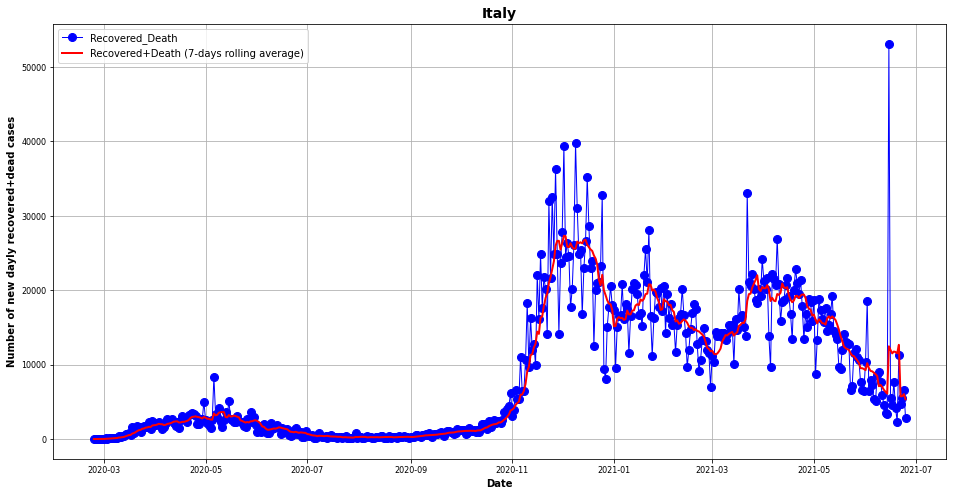

In [9]:
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df1.Day), df1.Recovered_Death_smooth, 'r', lw=2, label='Recovered+Death (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
plt.show()
#plt.savefig("recovered_death_data_Italy.png", quality=100, transparent=True, dpi=400)

In [65]:
# save italian dataframe as csv
df1.to_csv('../Data/dataset_ita.csv', index=False)

NameError: name 'df1' is not defined

In [13]:
def make_dataset(country: str):
    tmp = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

    if country == 'France':
        mask = tmp['Province/State'].isna() & (tmp['Country/Region'] == 'France')
    else:
        mask = tmp['Country/Region'] == country
        
    tmp = tmp[mask].iloc[:, 4:].T
    tmp['date'] = pd.to_datetime(tmp.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    tmp.columns = ['Confirmed', 'date']
    df = tmp[tmp.date >= '2020.02.28'].reset_index(drop=True)

    tmp = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
    tmp = tmp[mask].iloc[:, 4:].T 
    tmp['date'] = pd.to_datetime(tmp.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    tmp.columns = ['recovered', 'date']
    tmp = tmp[tmp.date >= '2020.02.28'].reset_index(drop=True)
    df['Recovered'] = tmp.loc[tmp.date >= '2020.02.28', 'recovered']

    tmp = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    tmp = tmp[mask].iloc[:, 4:].T
    tmp['date'] = pd.to_datetime(tmp.index, format='%m/%d/%y').strftime('%Y.%m.%d')
    tmp.columns = ['deaths', 'date']
    tmp = tmp[tmp.date >= '2020.02.28'].reset_index(drop=True)   
    df['Death'] = tmp.loc[tmp.date >= '2020.02.28', 'deaths']

    df['Active_cases'] = df.Confirmed - df.Recovered - df.Death
    df['Active_cases_smooth'] = df.Active_cases.rolling(7, min_periods=1).mean()
    df['Recovered_Death'] = (df.Recovered + df.Death).diff().fillna(0) # (daily derivative)
    df['Recovered_Death_smooth'] = df.Recovered_Death.rolling(7, min_periods=1).mean()

    return df

make_dataset('Spain')

<ipython-input-13-b28012ef8998>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[mask].iloc[:, 4:].T


,Confirmed,date,Recovered,Death,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,32,2020.02.28,0,0,32,3.200000e+01,0.0,0.000000
1,45,2020.02.29,0,0,45,3.850000e+01,0.0,0.000000
2,84,2020.03.01,0,0,84,5.366667e+01,0.0,0.000000
3,120,2020.03.02,0,0,120,7.025000e+01,0.0,0.000000
4,165,2020.03.03,0,1,164,8.900000e+01,1.0,0.200000
...,...,...,...,...,...,...,...,...
505,4100222,2021.07.17,429646,81096,3589480,3.539978e+06,4860.0,5960.285714
506,4100222,2021.07.18,432241,81096,3586885,3.557692e+06,2595.0,5575.571429
507,4161850,2021.07.19,438356,81119,3642375,3.579499e+06,6138.0,5439.571429
508,4189136,2021.07.20,443979,81148,3664009,3.598972e+06,5652.0,5392.142857


In [7]:
# save italian dataframe as csv
df_fra.to_csv('../Data/dataset_fra.csv', index=False)

In [14]:
df_fra = make_dataset('France')

df_fra

<ipython-input-13-b28012ef8998>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[mask].iloc[:, 4:].T


,Confirmed,date,Recovered,Death,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,57,2020.02.28,0,2,55,5.500000e+01,0.0,0.000000
1,100,2020.02.29,0,2,98,7.650000e+01,0.0,0.000000
2,130,2020.03.01,0,2,128,9.366667e+01,0.0,0.000000
3,191,2020.03.02,0,3,188,1.172500e+02,1.0,0.250000
4,212,2020.03.03,0,4,208,1.354000e+02,1.0,0.400000
...,...,...,...,...,...,...,...,...
505,5782231,2021.07.17,742632,110502,4929097,4.904455e+06,16.0,238.857143
506,5794763,2021.07.18,742632,110507,4941624,4.911730e+06,5.0,239.000000
507,5796453,2021.07.19,743245,110519,4942689,4.919133e+06,625.0,264.142857
508,5814442,2021.07.20,743449,110548,4960445,4.928129e+06,233.0,268.285714


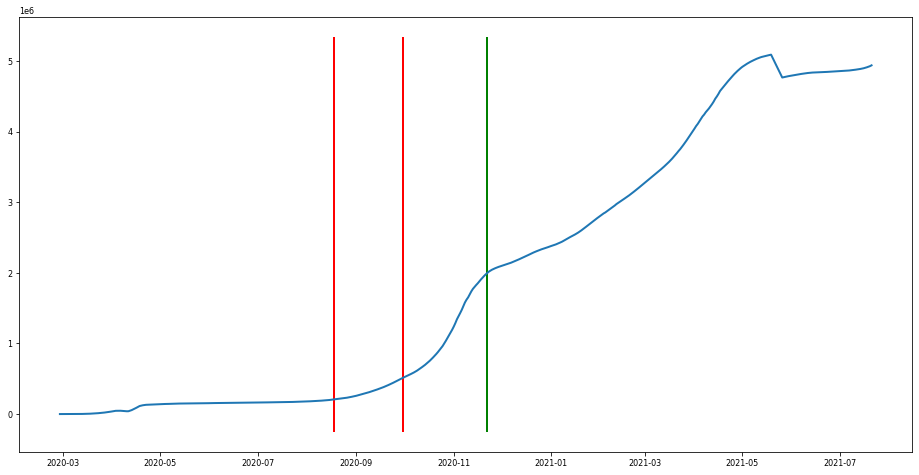

In [27]:
plt.plot(pd.to_datetime(df_fra.date), df_fra.Active_cases_smooth)
ymin, ymax = plt.ylim()
plt.vlines(pd.to_datetime(df_fra.date[df_fra.date == '2020.08.18']), ymin, ymax, color='r')
plt.vlines(pd.to_datetime(df_fra.date[df_fra.date == '2020.09.30']), ymin, ymax, color='r')
plt.vlines(pd.to_datetime(df_fra.date[df_fra.date == '2020.11.22']), ymin, ymax, color='g')

<ipython-input-10-5c8fdf6a9495>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tmp = tmp[mask].iloc[:, 4:].T


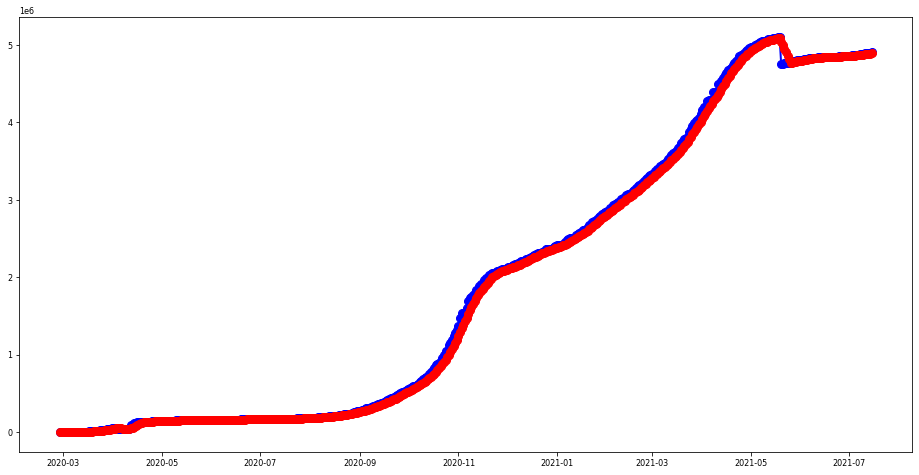

In [19]:
df = make_dataset('France')

plt.plot(pd.to_datetime(df[df.date >= '2020.02.28'].date), df[df.date >= '2020.02.28'].Active_cases, 'bo-')
plt.plot(pd.to_datetime(df[df.date >= '2020.02.28'].date), df[df.date >= '2020.02.28'].Active_cases_smooth, 'ro-')

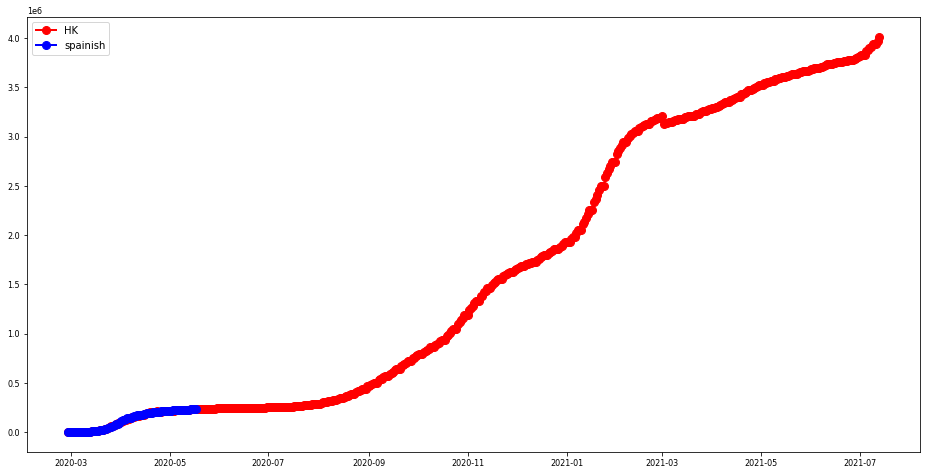

In [93]:
plt.plot(pd.to_datetime(df2[df2.date >= '2020.02.28'].date), df2[df2.date >= '2020.02.28'].Confirmed, 'ro-', label='HK')
plt.plot(pd.to_datetime(df.Day), df.Confirmed, 'bo-', label='spanish')
plt.legend()

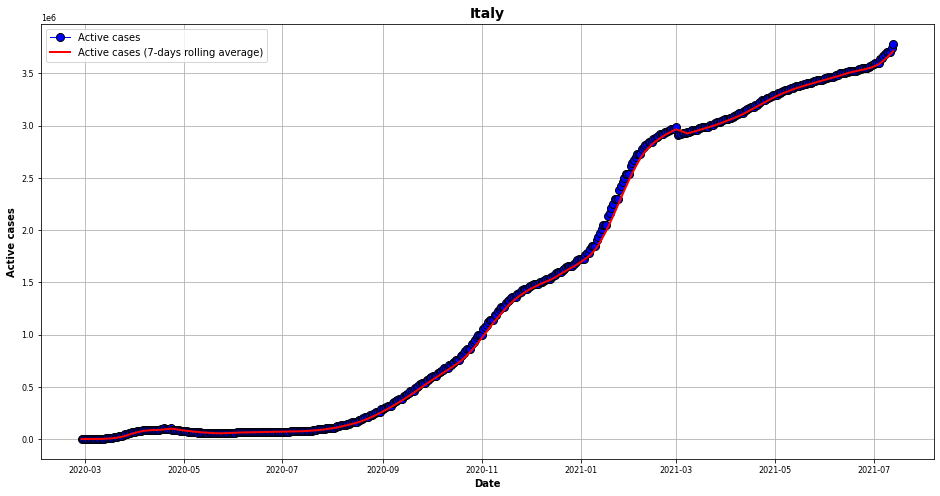

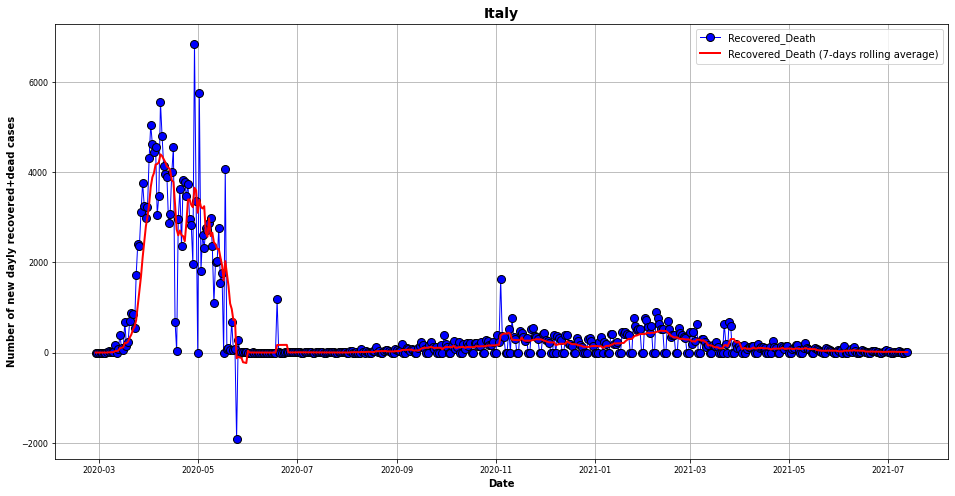

In [134]:
df2 = make_dataset('Spain')

# save figure with plot from january
plt.plot(pd.to_datetime(df2.date), df2.Active_cases, 'bo-', lw=1, mfc='b', mec='k', label='Active cases')
plt.plot(pd.to_datetime(df2.date), df2.Active_cases_smooth, 'r', lw=2, label='Active cases (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

plt.plot(pd.to_datetime(df2.date), df2.Recovered_Death, 'bo-', lw=1, mfc='b', mec='k', label='Recovered_Death')
plt.plot(pd.to_datetime(df2.date), df2.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (7-days rolling average)')
ymin, ymax = plt.ylim()
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.xlim(pd.to_datetime(df2[df2.date == '2020.05.01'].date), pd.to_datetime(df2[df2.date == '2021.07.01'].date))
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

In [71]:
df_fra = pd.read_csv('../Data/synthese-fra.csv')

df_fra = df_fra[['date', 'total_cas_confirmes', 'total_deces_hopital', 'total_deces_ehpad', 'total_patients_gueris']]
df_fra['Deaths'] = df_fra['total_deces_hopital'] + df_fra['total_deces_ehpad']
del df_fra['total_deces_hopital']
del df_fra['total_deces_ehpad']

df_fra.columns = ['Day', 'Confirmed', 'Recovered', 'Deaths']

df_fra.fillna(0, inplace=True)

df_fra['Confirmed_smooth'] = df_fra.Confirmed.rolling(7, min_periods=1).mean()
df_fra['Recovered_smooth'] = df_fra.Recovered.rolling(7, min_periods=1).mean()
df_fra['Deaths_smooth'] = df_fra.Deaths.rolling(7, min_periods=1).mean()
df_fra['Active_cases'] = df_fra.Confirmed - df_fra.Recovered - df_fra.Deaths
df_fra['Active_cases_smooth'] = df_fra.Confirmed_smooth - df_fra.Recovered_smooth - df_fra.Deaths_smooth
df_fra['Recovered_Death'] = (df_fra.Recovered + df_fra.Deaths).diff().fillna(0) # (daily derivative)
df_fra['Recovered_Death_smooth'] = (df_fra.Recovered_smooth + df_fra.Deaths_smooth).diff().fillna(0) # (daily derivative)
df_fra['Day'] = pd.to_datetime(df_fra.Day, format='%Y.%m.%d').dt.strftime('%Y.%m.%d')


df_fra

,Day,Confirmed,Recovered,Deaths,Confirmed_smooth,Recovered_smooth,Deaths_smooth,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.03.02,191,0.0,0.0,1.910000e+02,0.000000,0.000000,191.0,1.910000e+02,0.0,0.000000
1,2020.03.03,212,12.0,0.0,2.015000e+02,6.000000,0.000000,200.0,1.955000e+02,12.0,6.000000
2,2020.03.04,285,0.0,0.0,2.293333e+02,4.000000,0.000000,285.0,2.253333e+02,-12.0,-2.000000
3,2020.03.05,423,0.0,0.0,2.777500e+02,3.000000,0.000000,423.0,2.747500e+02,0.0,-1.000000
4,2020.03.06,613,0.0,0.0,3.448000e+02,2.400000,0.000000,613.0,3.424000e+02,0.0,-0.600000
...,...,...,...,...,...,...,...,...,...,...,...
497,2021.07.12,5813899,386424.0,111353.0,5.803281e+06,385876.571429,111296.428571,5316122.0,5.306108e+06,311.0,223.857143
498,2021.07.13,5820849,386704.0,111407.0,5.807604e+06,386078.714286,111321.571429,5322738.0,5.310204e+06,334.0,227.285714
499,2021.07.14,5829724,386839.0,111413.0,5.812613e+06,386271.428571,111343.571429,5331472.0,5.314998e+06,141.0,214.714286
500,2021.07.15,5833341,387017.0,111429.0,5.817503e+06,386456.714286,111364.285714,5334895.0,5.319682e+06,194.0,206.000000


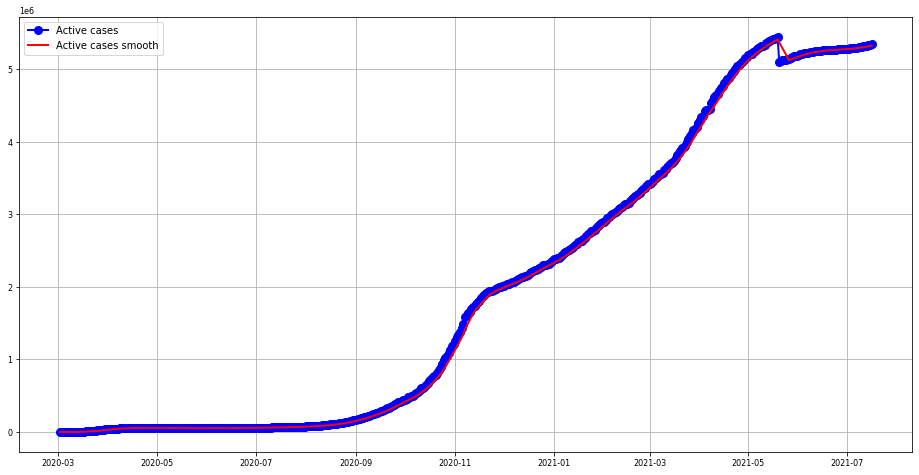

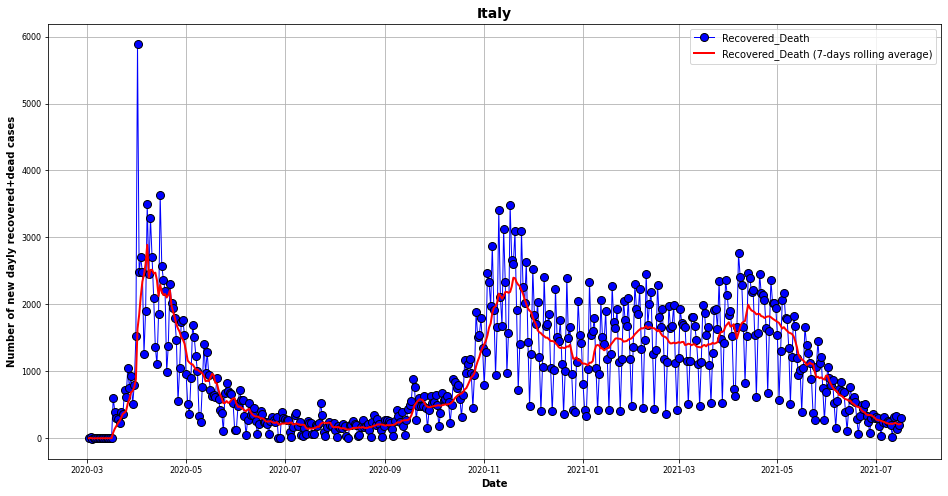

In [74]:
plt.plot(pd.to_datetime(df_fra.Day), df_fra.Active_cases, 'bo-', label='Active cases')
plt.plot(pd.to_datetime(df_fra.Day), df_fra.Active_cases_smooth, 'r-', label='Active cases smooth')
plt.legend()
plt.grid()
plt.show()

plt.plot(pd.to_datetime(df_fra.Day), df_fra.Recovered_Death, 'bo-', lw=1, mfc='b', mec='k', label='Recovered_Death')
plt.plot(pd.to_datetime(df_fra.Day), df_fra.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (7-days rolling average)')
ymin, ymax = plt.ylim()
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.xlim(pd.to_datetime(df_fra[df_fra.Day == '2020.05.01'].Day), pd.to_datetime(df_fra[df_fra.Day == '2021.07.01'].Day))
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

In [72]:
# save france dataframe as csv
df_fra.to_csv('../Data/dataset_fra.csv', index=False)

In [69]:
df_fra[df_fra.Active_cases_smooth == df_fra[df_fra.Day <= '2020-06-01'].Active_cases_smooth.max()]

,Day,Confirmed,Recovered,Deaths,Confirmed_smooth,Recovered_smooth,Deaths_smooth,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
57,2020-04-28,129859,46886.0,23660.0,124202.714286,44019.142857,22552.0,59313.0,57631.571429,1740.0,1509.857143


In [70]:
df_fra

,Day,Confirmed,Recovered,Deaths,Confirmed_smooth,Recovered_smooth,Deaths_smooth,Active_cases,Active_cases_smooth,Recovered_Death,Recovered_Death_smooth
0,2020-03-02,191,0.0,0.0,1.910000e+02,0.000000,0.000000,191.0,1.910000e+02,0.0,0.000000
1,2020-03-03,212,12.0,0.0,2.015000e+02,6.000000,0.000000,200.0,1.955000e+02,12.0,6.000000
2,2020-03-04,285,0.0,0.0,2.293333e+02,4.000000,0.000000,285.0,2.253333e+02,-12.0,-2.000000
3,2020-03-05,423,0.0,0.0,2.777500e+02,3.000000,0.000000,423.0,2.747500e+02,0.0,-1.000000
4,2020-03-06,613,0.0,0.0,3.448000e+02,2.400000,0.000000,613.0,3.424000e+02,0.0,-0.600000
...,...,...,...,...,...,...,...,...,...,...,...
497,2021-07-12,5813899,386424.0,111353.0,5.803281e+06,385876.571429,111296.428571,5316122.0,5.306108e+06,311.0,223.857143
498,2021-07-13,5820849,386704.0,111407.0,5.807604e+06,386078.714286,111321.571429,5322738.0,5.310204e+06,334.0,227.285714
499,2021-07-14,5829724,386839.0,111413.0,5.812613e+06,386271.428571,111343.571429,5331472.0,5.314998e+06,141.0,214.714286
500,2021-07-15,5833341,387017.0,111429.0,5.817503e+06,386456.714286,111364.285714,5334895.0,5.319682e+06,194.0,206.000000
